# Importing Useful Libraries

In [20]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [21]:
import warnings
warnings.filterwarnings('ignore')

# Reading Data From CSV File

In [22]:
df_salary = pd.read_csv('Salary_Data.csv')

In [23]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [24]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Correlation Matrix

In [25]:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Data Visualization

In [26]:
df_salary['YearsExperience'].iplot(kind='hist',bins=30,color='green')

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

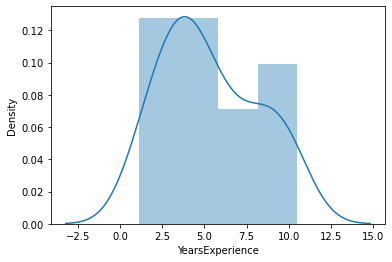

In [27]:
sns.distplot(df_salary['YearsExperience'])

In [28]:
df_salary['Salary'].iplot(kind='hist',bins=30,color='blue')

<AxesSubplot:xlabel='Salary', ylabel='Density'>

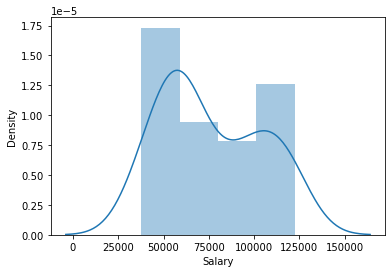

In [29]:
sns.distplot(df_salary['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

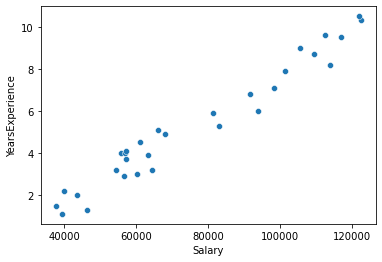

In [30]:
sns.scatterplot(x = 'Salary', y = 'YearsExperience', data = df_salary)

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

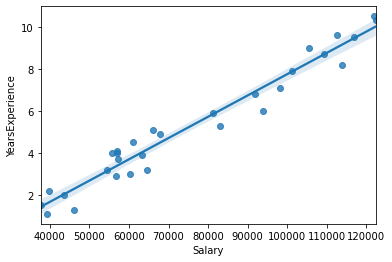

In [31]:
sns.regplot(x = 'Salary', y = 'YearsExperience', data = df_salary)

# Fitting A Linear Regression Model

In [32]:
model = smf.ols('YearsExperience~Salary', data = df_salary).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.14e-20
Time:                        00:29:42   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Coefficient
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [35]:
#P-Values and T-Values
print(model.pvalues, '\n', model.tvalues)

Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64 
 Intercept    -7.281283
Salary       24.950094
dtype: float64


# Predict For New Datapoints

In [36]:
# Pridict for 60000 and 70000 Salary
salary_hike = pd.Series([60000, 70000])

In [37]:
data_pred=pd.DataFrame(salary_hike,columns = ['Salary'])

In [38]:
model.predict(data_pred)

0    3.692779
1    4.705436
dtype: float64